In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import periodogram

%matplotlib inline


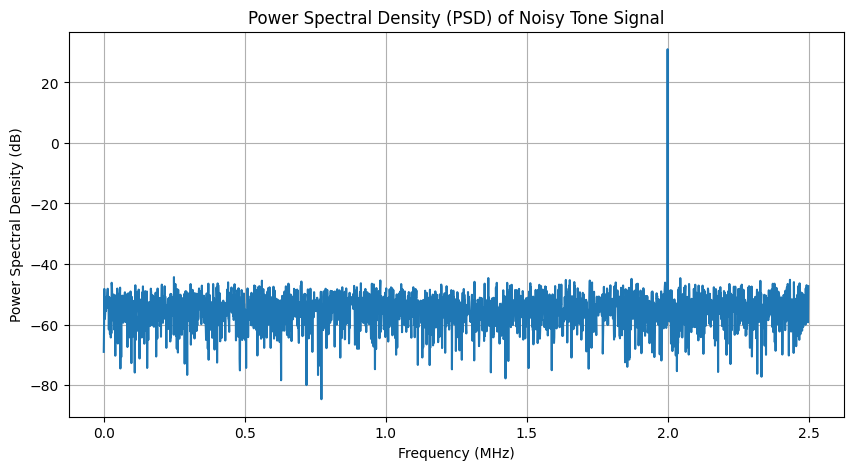

Computed SNR from DFT: 83.73 dB
Variance of Gaussian Noise: 5.000000e-06
Variance of Uniform Noise: 6.000000e-05


In [10]:
##1a

fs_new = 5e6  # Sampling frequency (Hz)
f_tone = 2e6  # Tone frequency (Hz)
A_tone = 1.0  # Amplitude (V)
T_new = 1e-3  # Duration (seconds)
SNR_dB = 50 # Signal-to-noise ratio (dB)

t= np.arange(0, T_new, 1/fs_new)
tone_signal = A_tone * np.sin(2 * np.pi * f_tone * t)

#SNR
P_signal_tone = np.mean(tone_signal ** 2)  # Compute signal power
P_noise_tone = P_signal_tone / (10 ** (SNR_dB / 10))  # Compute noise power
sigma_noise_tone = np.sqrt(P_noise_tone)  # Compute noise standard deviation

#noise
noise = np.random.normal(0, sigma_noise_tone, tone_signal.shape)
noisy_tone_signal = tone_signal + noise

#psd
N_tone = len(noisy_tone_signal)
frequencies_tone = np.fft.fftfreq(N_tone, 1/fs_new)  # Frequency bins
fft_values_tone = np.fft.fft(noisy_tone_signal)  # Compute FFT
PSD_tone = np.abs(fft_values_tone) ** 2 / N_tone  # Compute PSD

plt.figure(figsize=(10, 5))
plt.plot(frequencies_tone[:N_tone//2] / 1e6, 10 * np.log10(PSD_tone[:N_tone//2]))  # Convert to dB
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power Spectral Density (dB)")
plt.title("Power Spectral Density (PSD) of Noisy Tone Signal")
plt.grid()
plt.show()

#Solve from DFT
signal_power_DFT = np.max(PSD_tone)  
noise_power_DFT = np.mean(PSD_tone[frequencies_tone > f_tone + 1e5]) 
SNR_computed_dB = 10 * np.log10(signal_power_DFT / noise_power_DFT)

sigma_uniform = np.sqrt(12 * P_noise_tone)

print(f"Computed SNR from DFT: {SNR_computed_dB:.2f} dB")
print(f"Variance of Gaussian Noise: {sigma_noise_tone**2:.6e}")
print(f"Variance of Uniform Noise: {sigma_uniform**2:.6e}")


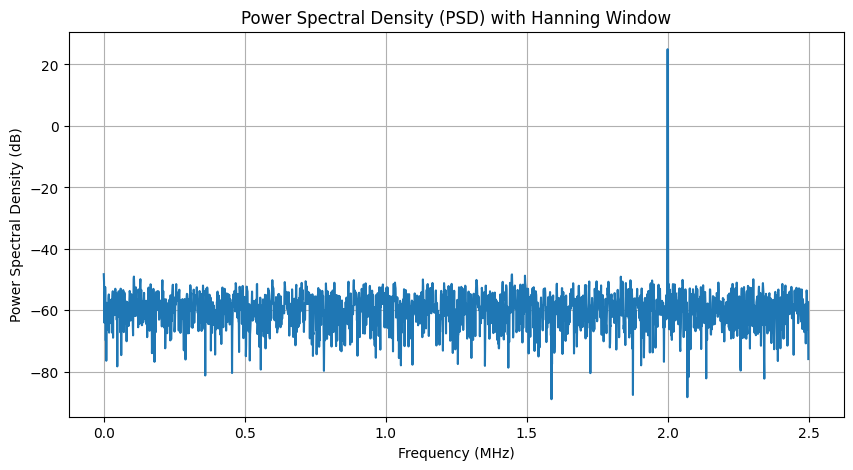

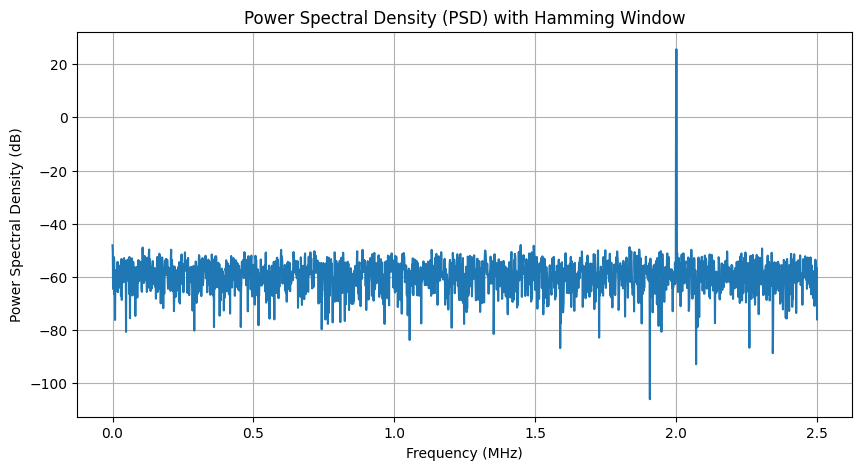

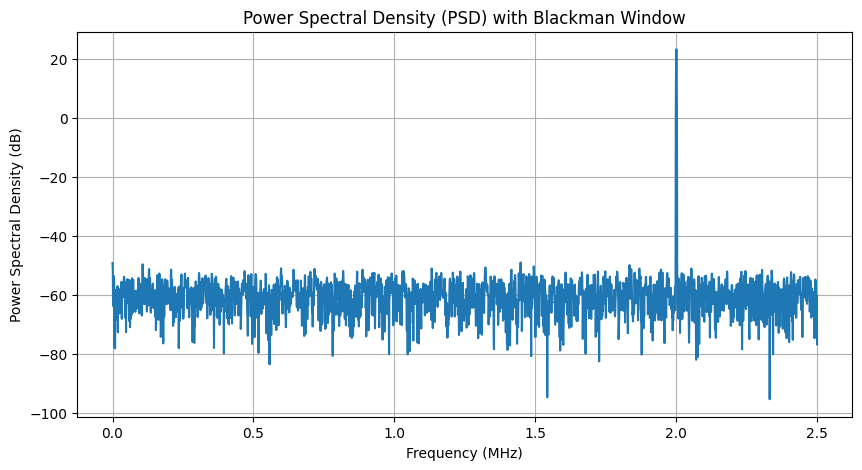

Computed SNR with Hanning window: 82.40 dB
Computed SNR with Hamming window: 82.81 dB
Computed SNR with Blackman window: 81.79 dB


In [11]:
#1b

fs_new = 5e6  # Sampling frequency (Hz)
f_tone = 2e6  # Tone frequency (Hz)
A_tone = 1.0  # Amplitude (V)
T_new = 1e-3  # Duration (seconds)
SNR_dB = 50 # Signal-to-noise ratio (dB)

t= np.arange(0, T_new, 1/fs_new)
tone_signal = A_tone * np.sin(2 * np.pi * f_tone * t)

#SNR
P_signal_tone = np.mean(tone_signal ** 2)  # Compute signal power
P_noise_tone = P_signal_tone / (10 ** (SNR_dB / 10))  # Compute noise power
sigma_noise_tone = np.sqrt(P_noise_tone)  # Compute noise standard deviation

#noise
noise = np.random.normal(0, sigma_noise_tone, tone_signal.shape)
noisy_tone_signal = tone_signal + noise

#psd
N_tone = len(noisy_tone_signal)
frequencies_tone = np.fft.fftfreq(N_tone, 1/fs_new)  # Frequency bins
fft_values_tone = np.fft.fft(noisy_tone_signal)  # Compute FFT
PSD_tone = np.abs(fft_values_tone) ** 2 / N_tone  # Compute PSD

windows = {
    "Hanning": np.hanning(len(noisy_tone_signal)),
    "Hamming": np.hamming(len(noisy_tone_signal)),
    "Blackman": np.blackman(len(noisy_tone_signal))
}

for name, window in windows.items():
    plt.figure(figsize=(10, 5))
    windowed_signal = noisy_tone_signal * window
    fft_values_tone = np.fft.fft(windowed_signal)
    PSD_tone = np.abs(fft_values_tone) ** 2 / len(windowed_signal)
    frequencies_tone = np.fft.fftfreq(len(windowed_signal), 1/fs_new)
    plt.plot(frequencies_tone[:len(windowed_signal)//2] / 1e6, 10 * np.log10(PSD_tone[:len(windowed_signal)//2]))
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (dB)")
    plt.title(f"Power Spectral Density (PSD) with {name} Window")
    plt.grid()
    plt.show()

# Verify SNR from DFT with windowing
for name, window in windows.items():
    windowed_signal = noisy_tone_signal * window
    fft_values_tone = np.fft.fft(windowed_signal)
    PSD_tone = np.abs(fft_values_tone) ** 2 / len(windowed_signal)
    signal_power_DFT_tone = np.max(PSD_tone)  # Peak corresponds to signal power
    noise_power_DFT_tone = np.mean(PSD_tone[frequencies_tone > f_tone + 1e5])  # Estimate noise floor
    SNR_computed_dB_tone = 10 * np.log10(signal_power_DFT_tone / noise_power_DFT_tone)  # Compute SNR
    print(f"Computed SNR with {name} window: {SNR_computed_dB_tone:.2f} dB")




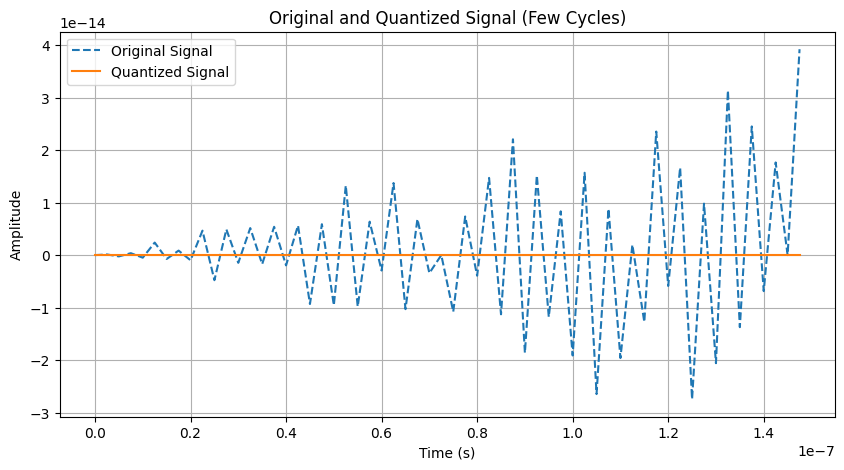

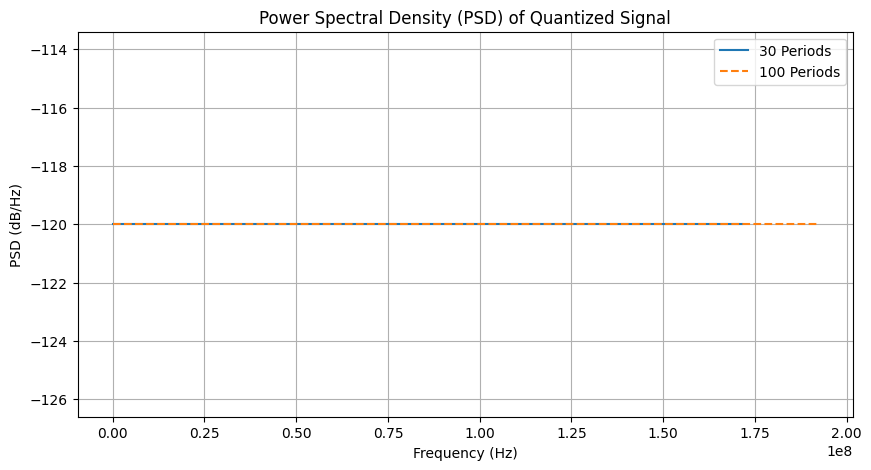

SNR for 30 periods: 0.00 dB
SNR for 100 periods: 0.00 dB
Theoretical SNR: 37.88 dB


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Define parameters
fs = 400e6  # Sampling frequency (Hz)
f_sig = 200e6  # Signal frequency (Hz)
bits = 6  # Number of quantization bits
levels = 2**bits  # Quantization levels
amp = 1  # Full-scale amplitude
periods_30 = 30  # Number of periods for first test
periods_100 = 100  # Number of periods for second test

# Time vector for 30 and 100 periods
T_sig = 1 / f_sig  # Signal period
t_30 = np.arange(0, periods_30 * T_sig, 1 / fs)
t_100 = np.arange(0, periods_100 * T_sig, 1 / fs)

# Generate sine wave
sine_30 = amp * np.sin(2 * np.pi * f_sig * t_30)
sine_100 = amp * np.sin(2 * np.pi * f_sig * t_100)

# Quantization function
def quantize(signal, levels):
    return np.round(signal * (levels / 2)) / (levels / 2)

# Quantize signals
quantized_30 = quantize(sine_30, levels)
quantized_100 = quantize(sine_100, levels)

# Compute PSD
def compute_psd(signal, fs):
    f, Pxx = welch(signal, fs, nperseg=len(signal)//8)
    return f, Pxx

f_30, Pxx_30 = compute_psd(quantized_30, fs)
f_100, Pxx_100 = compute_psd(quantized_100, fs)

# Compute SNR
def compute_snr(signal, quantized_signal):
    noise = signal - quantized_signal
    signal_power = np.var(signal)
    noise_power = np.var(noise)
    return 10 * np.log10(signal_power / noise_power)

snr_30 = compute_snr(sine_30, quantized_30)
snr_100 = compute_snr(sine_100, quantized_100)

# Plot original and quantized signals (for a few cycles)
plt.figure(figsize=(10, 5))
plt.plot(t_30[:100], sine_30[:100], label="Original Signal", linestyle="dashed")
plt.step(t_30[:100], quantized_30[:100], label="Quantized Signal", where='mid')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Original and Quantized Signal (Few Cycles)")
plt.grid()
plt.show()

# Plot PSD
plt.figure(figsize=(10, 5))
plt.plot(f_30, 10 * np.log10(Pxx_30 + 1e-12), label="30 Periods")  # Avoid log(0)
plt.plot(f_100, 10 * np.log10(Pxx_100 + 1e-12), label="100 Periods", linestyle="dashed")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.legend()
plt.title("Power Spectral Density (PSD) of Quantized Signal")
plt.grid()
plt.show()

# Print SNR results
print(f"SNR for 30 periods: {snr_30:.2f} dB")
print(f"SNR for 100 periods: {snr_100:.2f} dB")

# Theoretical SNR for 6-bit quantizer
snr_theoretical = 6.02 * bits + 1.76
print(f"Theoretical SNR: {snr_theoretical:.2f} dB")


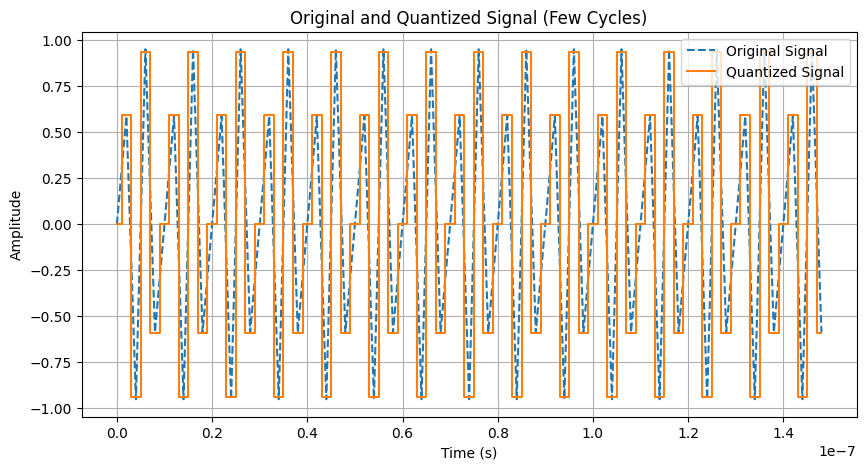

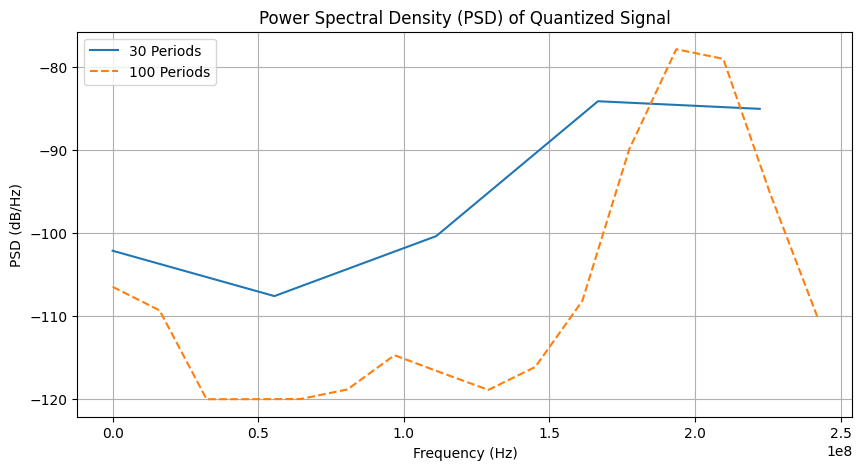

SNR for 30 periods: 37.56 dB
SNR for 100 periods: 37.56 dB
Theoretical SNR: 37.88 dB


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Define parameters
fs = 500e6  # Sampling frequency (Hz)
f_sig = 200e6  # Signal frequency (Hz)
bits = 6  # Number of quantization bits
levels = 2**bits  # Quantization levels
amp = 1  # Full-scale amplitude
periods_30 = 30  # Number of periods for first test
periods_100 = 100  # Number of periods for second test

# Time vector for 30 and 100 periods
T_sig = 1 / f_sig  # Signal period
t_30 = np.arange(0, periods_30 * T_sig, 1 / fs)
t_100 = np.arange(0, periods_100 * T_sig, 1 / fs)

# Generate sine wave
sine_30 = amp * np.sin(2 * np.pi * f_sig * t_30)
sine_100 = amp * np.sin(2 * np.pi * f_sig * t_100)

# Quantization function
def quantize(signal, levels):
    return np.round(signal * (levels / 2)) / (levels / 2)

# Quantize signals
quantized_30 = quantize(sine_30, levels)
quantized_100 = quantize(sine_100, levels)

# Compute PSD
def compute_psd(signal, fs):
    f, Pxx = welch(signal, fs, nperseg=len(signal)//8)
    return f, Pxx

f_30, Pxx_30 = compute_psd(quantized_30, fs)
f_100, Pxx_100 = compute_psd(quantized_100, fs)

# Compute SNR
def compute_snr(signal, quantized_signal):
    noise = signal - quantized_signal
    signal_power = np.var(signal)
    noise_power = np.var(noise)
    return 10 * np.log10(signal_power / noise_power)

snr_30 = compute_snr(sine_30, quantized_30)
snr_100 = compute_snr(sine_100, quantized_100)

# Plot original and quantized signals (for a few cycles)
plt.figure(figsize=(10, 5))
plt.plot(t_30[:100], sine_30[:100], label="Original Signal", linestyle="dashed")
plt.step(t_30[:100], quantized_30[:100], label="Quantized Signal", where='mid')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Original and Quantized Signal (Few Cycles)")
plt.grid()
plt.show()

# Plot PSD
plt.figure(figsize=(10, 5))
plt.plot(f_30, 10 * np.log10(Pxx_30 + 1e-12), label="30 Periods")  # Avoid log(0)
plt.plot(f_100, 10 * np.log10(Pxx_100 + 1e-12), label="100 Periods", linestyle="dashed")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.legend()
plt.title("Power Spectral Density (PSD) of Quantized Signal")
plt.grid()
plt.show()

# Print SNR results
print(f"SNR for 30 periods: {snr_30:.2f} dB")
print(f"SNR for 100 periods: {snr_100:.2f} dB")

# Theoretical SNR for 6-bit quantizer
snr_theoretical = 6.02 * bits + 1.76
print(f"Theoretical SNR: {snr_theoretical:.2f} dB")


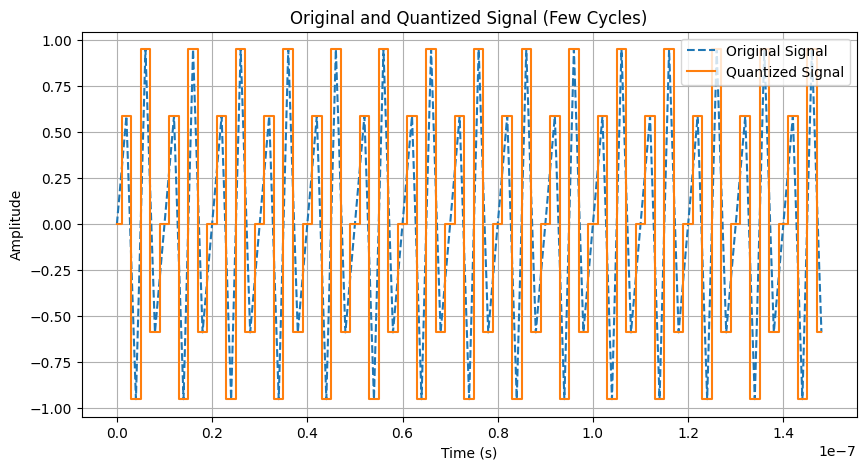

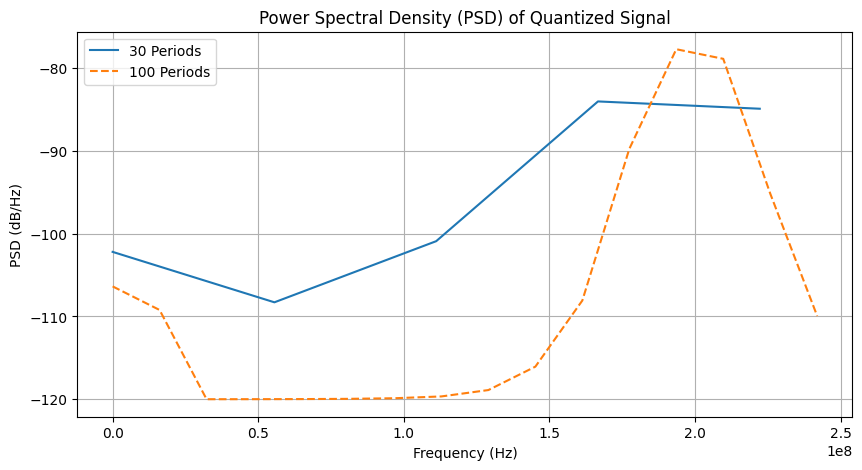

SNR for 30 periods: 77.09 dB
SNR for 100 periods: 77.09 dB
Theoretical SNR: 74.00 dB


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Define parameters
fs = 500e6  # Sampling frequency (Hz)
f_sig = 200e6  # Signal frequency (Hz)
bits = 12  # Number of quantization bits
levels = 2**bits  # Quantization levels
amp = 1  # Full-scale amplitude
periods_30 = 30  # Number of periods for first test
periods_100 = 100  # Number of periods for second test

# Time vector for 30 and 100 periods
T_sig = 1 / f_sig  # Signal period
t_30 = np.arange(0, periods_30 * T_sig, 1 / fs)
t_100 = np.arange(0, periods_100 * T_sig, 1 / fs)

# Generate sine wave
sine_30 = amp * np.sin(2 * np.pi * f_sig * t_30)
sine_100 = amp * np.sin(2 * np.pi * f_sig * t_100)

# Quantization function
def quantize(signal, levels):
    return np.round(signal * (levels / 2)) / (levels / 2)

# Quantize signals
quantized_30 = quantize(sine_30, levels)
quantized_100 = quantize(sine_100, levels)

# Compute PSD
def compute_psd(signal, fs):
    f, Pxx = welch(signal, fs, nperseg=len(signal)//8)
    return f, Pxx

f_30, Pxx_30 = compute_psd(quantized_30, fs)
f_100, Pxx_100 = compute_psd(quantized_100, fs)

# Compute SNR
def compute_snr(signal, quantized_signal):
    noise = signal - quantized_signal
    signal_power = np.var(signal)
    noise_power = np.var(noise)
    return 10 * np.log10(signal_power / noise_power)

snr_30 = compute_snr(sine_30, quantized_30)
snr_100 = compute_snr(sine_100, quantized_100)

# Plot original and quantized signals (for a few cycles)
plt.figure(figsize=(10, 5))
plt.plot(t_30[:100], sine_30[:100], label="Original Signal", linestyle="dashed")
plt.step(t_30[:100], quantized_30[:100], label="Quantized Signal", where='mid')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Original and Quantized Signal (Few Cycles)")
plt.grid()
plt.show()

# Plot PSD
plt.figure(figsize=(10, 5))
plt.plot(f_30, 10 * np.log10(Pxx_30 + 1e-12), label="30 Periods")  # Avoid log(0)
plt.plot(f_100, 10 * np.log10(Pxx_100 + 1e-12), label="100 Periods", linestyle="dashed")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.legend()
plt.title("Power Spectral Density (PSD) of Quantized Signal")
plt.grid()
plt.show()

# Print SNR results
print(f"SNR for 30 periods: {snr_30:.2f} dB")
print(f"SNR for 100 periods: {snr_100:.2f} dB")

# Theoretical SNR for 6-bit quantizer
snr_theoretical = 6.02 * bits + 1.76
print(f"Theoretical SNR: {snr_theoretical:.2f} dB")


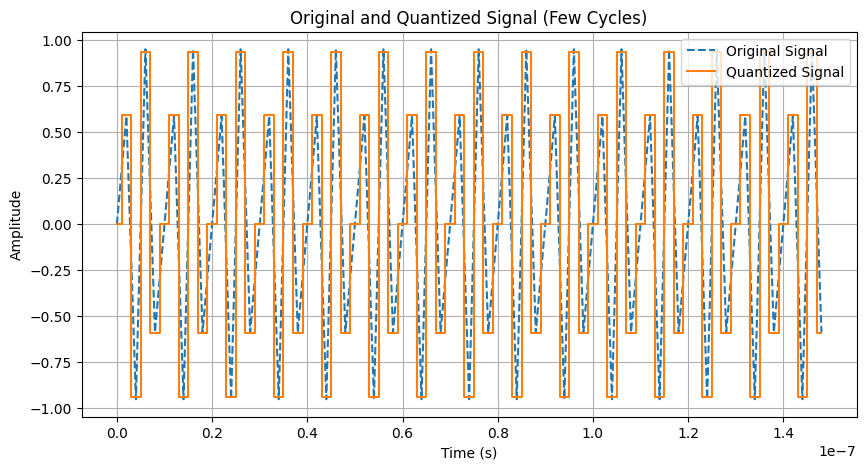

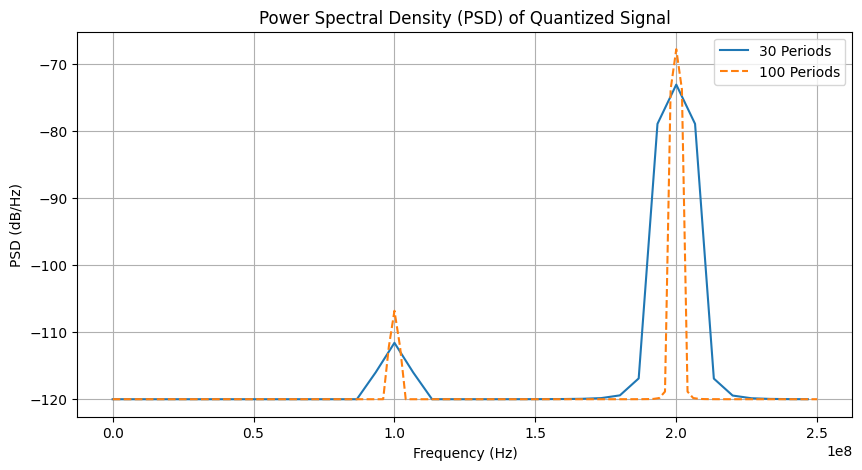

SNR for 30 periods: 37.56 dB
SNR for 100 periods: 37.56 dB
Theoretical SNR: 37.88 dB


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, windows

# Define parameters
fs = 500e6  # Sampling frequency (Hz)
f_sig = 200e6  # Signal frequency (Hz)
bits = 6  # Number of quantization bits
levels = 2**bits  # Quantization levels
amp = 1  # Full-scale amplitude
periods_30 = 30  # Number of periods for first test
periods_100 = 100  # Number of periods for second test

# Time vector for 30 and 100 periods
T_sig = 1 / f_sig  # Signal period
t_30 = np.arange(0, periods_30 * T_sig, 1 / fs)
t_100 = np.arange(0, periods_100 * T_sig, 1 / fs)

# Generate sine wave
sine_30 = amp * np.sin(2 * np.pi * f_sig * t_30)
sine_100 = amp * np.sin(2 * np.pi * f_sig * t_100)

# Quantization function
def quantize(signal, levels):
    return np.round(signal * (levels / 2)) / (levels / 2)

# Quantize signals
quantized_30 = quantize(sine_30, levels)
quantized_100 = quantize(sine_100, levels)

# Compute PSD with Hanning window
def compute_psd(signal, fs):
    nperseg = min(len(signal), 1024)  # Ensure nperseg matches the window size
    window = windows.hann(nperseg)
    f, Pxx = welch(signal, fs, window=window, nperseg=nperseg)
    return f, Pxx

f_30, Pxx_30 = compute_psd(quantized_30, fs)
f_100, Pxx_100 = compute_psd(quantized_100, fs)

# Compute SNR
def compute_snr(signal, quantized_signal):
    noise = signal - quantized_signal
    signal_power = np.var(signal)
    noise_power = np.var(noise)
    return 10 * np.log10(signal_power / noise_power)

snr_30 = compute_snr(sine_30, quantized_30)
snr_100 = compute_snr(sine_100, quantized_100)

# Plot original and quantized signals (for a few cycles)
plt.figure(figsize=(10, 5))
plt.plot(t_30[:100], sine_30[:100], label="Original Signal", linestyle="dashed")
plt.step(t_30[:100], quantized_30[:100], label="Quantized Signal", where='mid')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Original and Quantized Signal (Few Cycles)")
plt.grid()
plt.show()

# Plot PSD
plt.figure(figsize=(10, 5))
plt.plot(f_30, 10 * np.log10(Pxx_30 + 1e-12), label="30 Periods")  # Avoid log(0)
plt.plot(f_100, 10 * np.log10(Pxx_100 + 1e-12), label="100 Periods", linestyle="dashed")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.legend()
plt.title("Power Spectral Density (PSD) of Quantized Signal")
plt.grid()
plt.show()

# Print SNR results
print(f"SNR for 30 periods: {snr_30:.2f} dB")
print(f"SNR for 100 periods: {snr_100:.2f} dB")

# Theoretical SNR for 6-bit quantizer
snr_theoretical = 6.02 * bits + 1.76
print(f"Theoretical SNR: {snr_theoretical:.2f} dB")


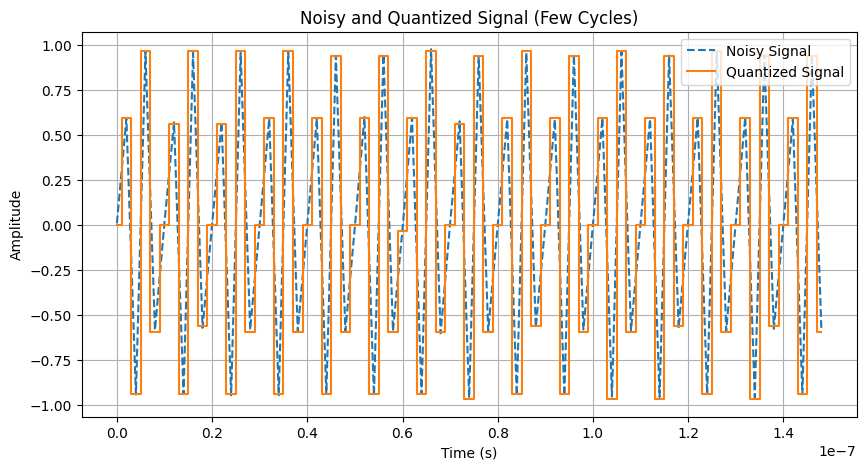

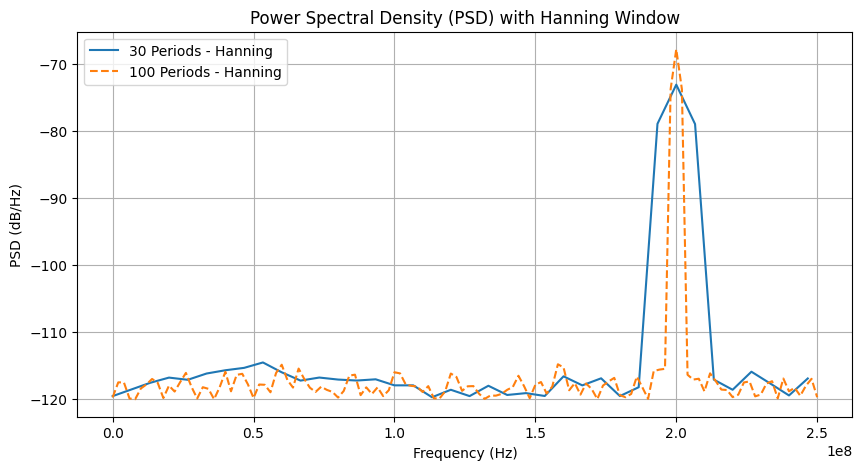

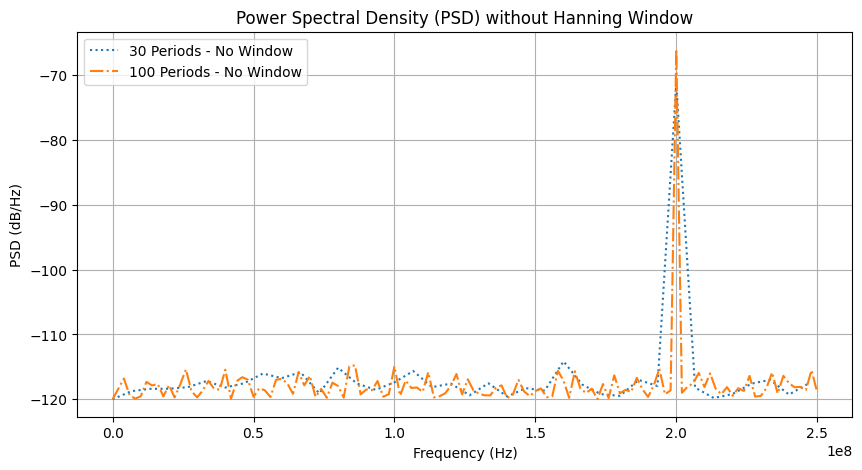

SNR for 30 periods: 38.81 dB
SNR for 100 periods: 38.17 dB
Theoretical SNR: 37.88 dB


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, windows

# Define parameters
fs = 500e6  # Sampling frequency (Hz)
f_sig = 200e6  # Signal frequency (Hz)
bits = 6  # Number of quantization bits
levels = 2**bits  # Quantization levels
amp = 1  # Full-scale amplitude
periods_30 = 30  # Number of periods for first test
periods_100 = 100  # Number of periods for second test

# Target SNR
target_snr_db = 38  # Desired SNR in dB

# Time vector for 30 and 100 periods
T_sig = 1 / f_sig  # Signal period
t_30 = np.arange(0, periods_30 * T_sig, 1 / fs)
t_100 = np.arange(0, periods_100 * T_sig, 1 / fs)

# Generate sine wave
sine_30 = amp * np.sin(2 * np.pi * f_sig * t_30)
sine_100 = amp * np.sin(2 * np.pi * f_sig * t_100)

# Compute noise power needed for target SNR
signal_power_30 = np.var(sine_30)
noise_power_30 = signal_power_30 / (10**(target_snr_db / 10))
noise_30 = np.random.normal(0, np.sqrt(noise_power_30), size=sine_30.shape)

signal_power_100 = np.var(sine_100)
noise_power_100 = signal_power_100 / (10**(target_snr_db / 10))
noise_100 = np.random.normal(0, np.sqrt(noise_power_100), size=sine_100.shape)

# Add noise to signals
noisy_sine_30 = sine_30 + noise_30
noisy_sine_100 = sine_100 + noise_100

# Quantization function
def quantize(signal, levels):
    return np.round(signal * (levels / 2)) / (levels / 2)

# Quantize signals
quantized_30 = quantize(noisy_sine_30, levels)
quantized_100 = quantize(noisy_sine_100, levels)

# Compute PSD with and without Hanning window
def compute_psd(signal, fs, use_window=True):
    nperseg = min(len(signal), 1024)  # Ensure nperseg matches the window size
    window = windows.hann(nperseg) if use_window else 'boxcar'
    f, Pxx = welch(signal, fs, window=window, nperseg=nperseg)
    return f, Pxx

f_30_hann, Pxx_30_hann = compute_psd(quantized_30, fs, use_window=True)
f_100_hann, Pxx_100_hann = compute_psd(quantized_100, fs, use_window=True)
f_30_rect, Pxx_30_rect = compute_psd(quantized_30, fs, use_window=False)
f_100_rect, Pxx_100_rect = compute_psd(quantized_100, fs, use_window=False)

# Compute SNR
def compute_snr(signal, quantized_signal):
    noise = signal - quantized_signal
    signal_power = np.var(signal)
    noise_power = np.var(noise)
    return 10 * np.log10(signal_power / noise_power)

snr_30 = compute_snr(noisy_sine_30, quantized_30)
snr_100 = compute_snr(noisy_sine_100, quantized_100)

# Plot original and quantized signals (for a few cycles)
plt.figure(figsize=(10, 5))
plt.plot(t_30[:100], noisy_sine_30[:100], label="Noisy Signal", linestyle="dashed")
plt.step(t_30[:100], quantized_30[:100], label="Quantized Signal", where='mid')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Noisy and Quantized Signal (Few Cycles)")
plt.grid()
plt.show()

# Plot PSD with Hanning window
plt.figure(figsize=(10, 5))
plt.plot(f_30_hann, 10 * np.log10(Pxx_30_hann + 1e-12), label="30 Periods - Hanning")
plt.plot(f_100_hann, 10 * np.log10(Pxx_100_hann + 1e-12), label="100 Periods - Hanning", linestyle="dashed")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.legend()
plt.title("Power Spectral Density (PSD) with Hanning Window")
plt.grid()
plt.show()

# Plot PSD without Hanning window
plt.figure(figsize=(10, 5))
plt.plot(f_30_rect, 10 * np.log10(Pxx_30_rect + 1e-12), label="30 Periods - No Window", linestyle="dotted")
plt.plot(f_100_rect, 10 * np.log10(Pxx_100_rect + 1e-12), label="100 Periods - No Window", linestyle="dashdot")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.legend()
plt.title("Power Spectral Density (PSD) without Hanning Window")
plt.grid()
plt.show()

# Print SNR results
print(f"SNR for 30 periods: {snr_30:.2f} dB")
print(f"SNR for 100 periods: {snr_100:.2f} dB")

# Theoretical SNR for 6-bit quantizer
snr_theoretical = 6.02 * bits + 1.76
print(f"Theoretical SNR: {snr_theoretical:.2f} dB")


In [34]:
#Lab
peak=-5.6
floor=np.array([-76,-90, -94,-96, -84, -81,-82, -86,-86,-86,-87,-89,-88,-99,-91,-102,-89,-89,-95])

floor_avg =np.average(floor)


print('floor_avg(db)=',floor_avg)
peak = 10**(peak/10)
floor_avg=10**(floor_avg/10)
print('floor_avg=',floor_avg)

print('snr=',peak / floor_avg)
SNR_computed_dB = 10 * np.log10(peak / floor_avg)

(SNR_computed_dB)

enob = (SNR_computed_dB-1.75)/6.02

print("snr db=", SNR_computed_dB)
print('enob=',enob)


print("\n\nwith noise")
#Lab
peak=-5.6
floor=np.array([-76,-90, -94,-96, -84, -81,-82, -86,-86,-86,-87,-89,-88,-99,-91,-102,-89,-89,-95,-76,-112,-101,-97])

floor_avg =np.average(floor)


print('floor_avg(db)=',floor_avg)
peak = 10**(peak/10)
floor_avg=10**(floor_avg/10)
print('floor_avg=',floor_avg)

print('snr=',peak / floor_avg)
SNR_computed_dB = 10 * np.log10(peak / floor_avg)

(SNR_computed_dB)

enob = (SNR_computed_dB-1.75)/6.02

print("snr db=", SNR_computed_dB)
print('enob=',enob)

floor_avg(db)= -88.94736842105263
floor_avg= 1.2742749857031322e-09
snr= 216140843.5572806
snr db= 83.34736842105264
enob= 13.554380136387483


with noise
floor_avg(db)= -90.26086956521739
floor_avg= 9.417010257544202e-10
snr= 211878532.61287734
snr db= 83.2608695652174
enob= 13.540011555683956
